In [3]:
import os
from matplotlib import pyplot as plt
import numpy as np
import time as tm

In [16]:
path = '/Users/ricoxi/Desktop/Coding/Fresnel Factor/water_gold_sapphire'
os.chdir(path)
import import_ipynb
from extract_data2 import mylib

In [5]:
def to_wn(value):
    wn = 10 ** 7 / value
    return wn

def to_wl(value):
    wl = 10 ** 7 / value
    return wl

def to_rad(value):
    rad = value * np.pi /180
    return rad

def to_degree(value):
    degree = value * 180 / np.pi
    return degree

def sfg_angle(ir, vis, ir_a, vis_a):
    theta = np.arctan((ir * np.sin(ir_a) + vis * np.sin(vis_a))/(
    ir * np.cos(ir_a) + vis * np.cos(vis_a)))
    return theta

def theta_1(n_1, gamma):
    θ = np.pi / 3 - np.arcsin(1 * np.sin(np.pi / 3 - gamma)/ n_1 )
    return θ

def refract(θ_i, ind_i, ind_j):
    cos_theta_j = np.sqrt(1 - (ind_i ** 2) / (ind_j ** 2) * (np.sin(θ_i) ** 2))
    theta_j = np.arccos(cos_theta_j)
    return theta_j 

In [6]:
# list of IR wn of which the final output will be plotted against
IR_wn = [mylib.m1_ir[i][0] for i in range(len(mylib.m1_ir))]
IR_wl = [to_wl(mylib.m1_ir[i][0]) for i in range(len(mylib.m1_ir))]
# visible beam centered at
vis_wl = 800.
vis_wn = to_wn(vis_wl)
# list of sfg wn
sfg_wn = [IR_wn[i] + vis_wn for i in range(len(IR_wn))]
sfg_wl = [to_wn(i) for i in sfg_wn]
# thickness of gold
d_gold = 5
'''
input IR and vis 𝜸 angles here
'''
𝜸 = 22
𝜸_IR  = to_rad(𝜸)
𝜸_vis = to_rad(𝜸)

In [7]:
'''
m1 = SAPPHIRE
m2 = GOLD
m3 = WATER
'''

ind_1_IR = [complex(i[1],i[2]) for i in mylib.m1_ir]
ind_2_IR = [complex(i[1],i[2]) for i in mylib.m2_ir]
ind_3_IR = [complex(i[1],i[2]) for i in mylib.m3_ir]

ind_1_vis = complex(mylib.m1_vis[1],mylib.m1_vis[2])
ind_2_vis = complex(mylib.m2_vis[1],mylib.m2_vis[2])
ind_3_vis = complex(mylib.m3_vis[1],mylib.m3_vis[2])

ind_1_sfg = [complex(i[1],i[2]) for i in mylib.m1_sfg]
ind_2_sfg = [complex(i[1],i[2]) for i in mylib.m2_sfg]
ind_3_sfg = [complex(i[1],i[2]) for i in mylib.m3_sfg]

In [8]:
'''
All the angles in the world
'''
θ_1_IR = [theta_1(i, 𝜸_IR) for i in ind_1_IR]
θ_2_IR = [refract(i[0], i[1], i[2]) for i in zip(θ_1_IR, ind_1_IR, ind_2_IR)]
θ_3_IR = [refract(i[0], i[1], i[2]) for i in zip(θ_2_IR, ind_2_IR, ind_3_IR)]

θ_1_vis = theta_1(ind_1_vis, 𝜸_vis)
θ_2_vis = refract(θ_1_vis, ind_1_vis, ind_2_vis)
θ_3_vis = refract(θ_2_vis, ind_2_vis, ind_3_vis)

θ_1_sfg = [sfg_angle(i[0], vis_wn, i[1], θ_1_vis) for i in zip(IR_wn, θ_1_IR)]
θ_2_sfg = [refract(i[0], i[1], i[2]) for i in zip(θ_1_sfg, ind_1_sfg, ind_2_sfg)]

In [15]:
to_degree(np.asarray(θ_1_IR))

array([38.33661181+0.j, 38.34742019+0.j, 38.35806967+0.j, 38.36856348+0.j,
       38.37890475+0.j, 38.38909655+0.j, 38.39413734+0.j, 38.39914187+0.j,
       38.40411051+0.j, 38.40904361+0.j, 38.4188046 +0.j, 38.42842761+0.j,
       38.43791534+0.j, 38.44260929+0.j, 38.4472704 +0.j, 38.45649536+0.j,
       38.46559272+0.j, 38.48341431+0.j, 38.50075395+0.j, 38.50924866+0.j,
       38.51762953+0.j, 38.52589866+0.j, 38.5340581 +0.j, 38.54210986+0.j,
       38.5500559 +0.j, 38.55789814+0.j, 38.56563843+0.j, 38.57327862+0.j,
       38.58082047+0.j, 38.58826575+0.j, 38.59561615+0.j, 38.60287333+0.j,
       38.61003893+0.j, 38.61711454+0.j, 38.62410172+0.j, 38.63100199+0.j,
       38.63781683+0.j, 38.64454771+0.j, 38.65776324+0.j, 38.67065961+0.j,
       38.68324738+0.j, 38.69553669+0.j, 38.70753723+0.j, 38.7192583 +0.j,
       38.73070882+0.j, 38.74189736+0.j, 38.76352102+0.j, 38.78419119+0.j,
       38.79418675+0.j, 38.80396504+0.j, 38.81353253+0.j, 38.82289545+0.j,
       38.8320598 +0.j, 3

In [9]:
def r_ij_p(n_i, n_j, theta_i, theta_j):
    r = (n_j * np.cos(theta_i) - n_i * np.cos(theta_j)) / (n_j * np.cos(theta_i) + n_i * np.cos(theta_j))
    return r

def r_ij_s(n_i, n_j, theta_i, theta_j):
    r = (n_i * np.cos(theta_i) - n_j * np.cos(theta_j)) / (n_i * np.cos(theta_i) + n_j * np.cos(theta_j))
    return r

def t_ij_p(n_i, n_j, theta_i, theta_j):
    t = (2 * n_i * np.cos(theta_i)) / (n_j * np.cos(theta_i) + n_i * np.cos(theta_j))
    return t

def t_ij_s(n_i, n_j, theta_i, theta_j):
    t = (2 * n_i * np.cos(theta_i)) / (n_i * np.cos(theta_i) + n_j * np.cos(theta_j))
    return t

# =========================================== #
def beta(wavelength, n_2, thickness, theta_2):
    β = 2 * np.pi / wavelength * n_2 * thickness * np.cos(theta_2)
    return β

def delta_ir(ir_wl, vis_wl, n_1_ir, n_2_ir, thickness, theta_1_ir, theta_2_ir, theta_2_sfg):
    Δ = (2 * np.pi * n_2_ir * thickness) / (ir_wl * np.cos(theta_2_ir)) - (2 * np.pi * n_1_ir * thickness) / vis_wl * (np.tan(theta_2_ir) + np.tan(theta_2_sfg)) * np.sin(theta_1_ir)
    return Δ

# =========================================== #
def L_II_xx(delta, t_12_p, r_12_p, r_23_p, beta, theta_2, theta_1):
    L = np.e ** (1j * delta) * (t_12_p) / (1 + r_12_p * r_23_p * np.e **(2 * 1j * beta)) * (1 - r_23_p) * np.cos(theta_2) / np.cos(theta_1)
    return L

# =========================================== #
def check(r, t, n_1, theta_1, n_2, theta_2):
    R = r * r.conjugate()
    T = t * t.conjugate() * (n_2 * np.cos(theta_2)) / (n_1 * np.cos(theta_1))
    return T + R

In [10]:
β_ir = [beta(i[0], i[1], d_gold, i[2]) for i in zip(IR_wl, ind_2_IR, θ_2_IR)]

Δ_ir = [delta_ir(i[0], vis_wl, i[1], i[2], d_gold, i[3], i[4], i[5])
       for i in zip(IR_wl, ind_1_IR, ind_2_IR, θ_1_IR, θ_2_IR, θ_2_sfg)]

# =========================================== #
r_12_p_ir = [r_ij_p(i[0], i[1], i[2], i[3]) 
             for i in zip(ind_1_IR, ind_2_IR, θ_1_IR, θ_2_IR)]
t_12_p_ir = [t_ij_p(i[0], i[1], i[2], i[3]) 
             for i in zip(ind_1_IR, ind_2_IR, θ_1_IR, θ_2_IR)]
r_23_p_ir = [r_ij_p(i[0], i[1], i[2], i[3]) 
             for i in zip(ind_2_IR, ind_3_IR, θ_2_IR, θ_3_IR)]

# =========================================== #
L_II_xx_ir = [L_II_xx(i[0],i[1],i[2],i[3],i[4],i[5],i[6]) 
              for i in zip(Δ_ir, t_12_p_ir, r_12_p_ir, r_23_p_ir, β_ir, θ_2_IR, θ_1_IR)]
L_II_xx_ir_sq = [i * i.conjugate() for i in L_II_xx_ir]


Input gamma is 22 degrees.



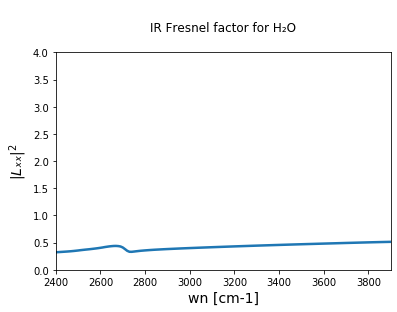

In [11]:
plt.figure(figsize=(6,4))
plt.plot(IR_wn, [i.real for i in L_II_xx_ir_sq], linewidth = 2.5)
plt.ylim(0, 4)
plt.ylabel('$|L\u2093\u2093|^2$', fontsize=14)
plt.xlabel('wn [cm-1]',fontsize=14)
plt.xlim(2400,3900)
plt.title('\nIR Fresnel factor for H\u2082O\n')
print(f'\nInput gamma is {𝜸} degrees.\n')

In [12]:
check_12_ir = [check(i[0], i[1], i[2], i[3], i[4], i[5]) for i in zip(r_12_p_ir, t_12_p_ir, ind_1_IR, θ_1_IR, ind_2_IR, θ_2_IR)]